<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/drugVAE/RNNVAE_08_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -R 'a_inhibitor_design'
! git clone https://github.com/yingzibu/a_inhibitor_design.git --quiet
!rm -R 'JAK_ML'
! git clone https://github.com/yingzibu/JAK_ML.git --quiet
!rm -R 'JAK-MTATFP'
! git clone https://github.com/Yimeng-Wang/JAK-MTATFP.git --quiet

! pip install pubchempy --quiet
! pip install rdkit --quiet

rm: cannot remove 'a_inhibitor_design': No such file or directory
rm: cannot remove 'JAK_ML': No such file or directory
rm: cannot remove 'JAK-MTATFP': No such file or directory
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 42.8 MB/s eta 0:00:00


In [174]:
!rm -R 'a_inhibitor_design'
! git clone https://github.com/yingzibu/a_inhibitor_design.git --quiet

rm: cannot remove 'a_inhibitor_design': No such file or directory


In [2]:
from tqdm import tqdm
import pandas as pd
from os import walk
import os

In [175]:
cd a_inhibitor_design/data

/content/a_inhibitor_design/data/a_inhibitor_design/data/a_inhibitor_design/data


In [ ]:
from tokenizer import encode_single

In [51]:
from tokenizer import *

import torch
smiles = {}

smiles['MMT3-72'] = 'O=C(NCCC(O)=O)C(C=C1)=CC=C1/N=N/C(C=C2C(O)=O)=CC=C2OCCOC3=CC=C(NC4=NC=C(C)C(NC5=CC=CC(S(NC(C)(C)C)(=O)=O)=C5)=N4)C=C3'
smiles['M1'] = 'OCCOC1=CC=C(NC2=NC=C(C)C(NC3=CC=CC(S(N)(=O)=O)=C3)=N2)C=C1'
smiles['M2'] = 'OCCOC1=CC=C(NC2=NC=C(C)C(NC3=CC=CC(S(NC(C)(C)C)(=O)=O)=C3)=N2)C=C1'
smiles['M3'] = 'OC(COC1=CC=C(NC2=NC=C(C)C(NC3=CC=CC(S(NC(C)(C)C)(=O)=O)=C3)=N2)C=C1)=O'
smiles['M4'] = 'O=C(NCCC(O)=O)C(C=C1)=CC=C1/N=N/C(C=C2C(O)=O)=CC=C2OCCOC3=CC=C(NC4=NC=C(C)C(NC5=CC=CC(S(N)(=O)=O)=C5)=N4)C=C3'
smiles['M5'] = 'OC1=CC=C(NC2=NC=C(C)C(NC3=CC=CC(S(NC(C)(C)C)(=O)=O)=C3)=N2)C=C1'
smiles['Fedratinib'] = 'Cc1cnc(nc1Nc1cccc(c1)S(=O)(=O)NC(C)(C)C)Nc1ccc(cc1)OCCN1CCCC1'
smiles['Ruxolitinib'] = 'C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3'

cuda = torch.cuda.is_available()
if cuda: device = 'cuda'
else: device = 'cpu'
MAX_LEN = 120

In [5]:
t, lens = encode(list(smiles.values()))
print(lens)

[118, 59, 67, 71, 110, 64, 62, 45]


In [177]:
def encode_single(smi, pad_size=ATOM_MAX_LEN):
    tokens = ([1] + [__t2i[tok]
                for tok in smiles_tokenizer(smi)])[:pad_size - 1]
    return tokens, len(tokens)

ImportError: ignored

In [165]:
new_data = pd.read_csv('/content/drive/MyDrive/A_DATA/filtered_chembl_for_gentrl.csv')
new_data.head()

,SMILES,plogP,QED
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,-1.686554,0.608781
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-25.745690,0.016357
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,-22.948679,0.010798
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,-15.732651,0.016726
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,0.679815,0.623114


In [ ]:
smiles_long = new_data['SMILES']


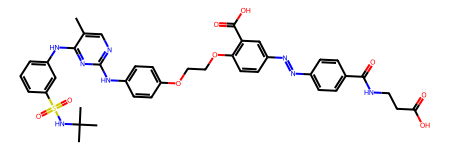

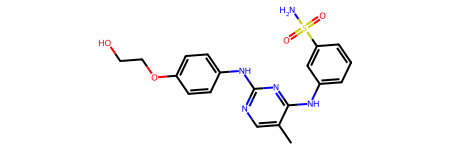

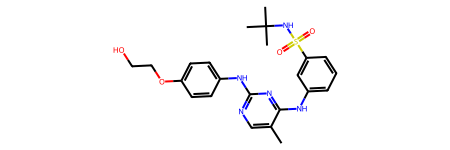

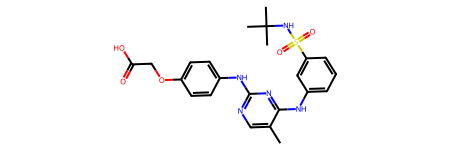

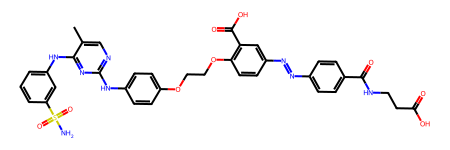

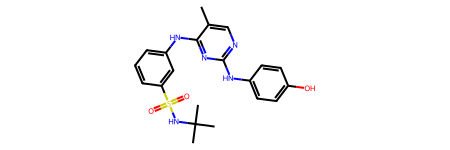

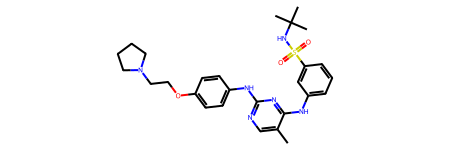

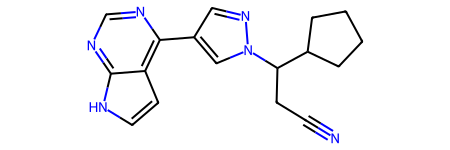

In [166]:
import rdkit
from rdkit import Chem
from IPython.display import display
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles
s = Chem.MolToSmiles
for i in smiles.values():
    display(m(i))

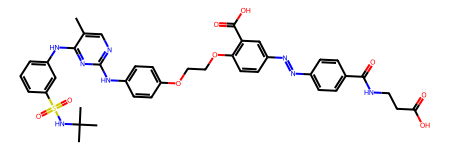

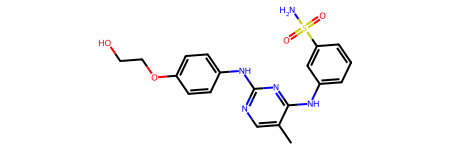

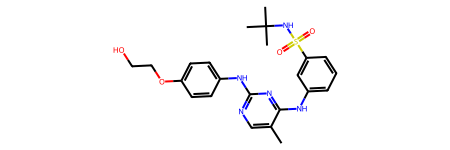

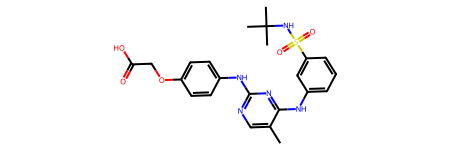

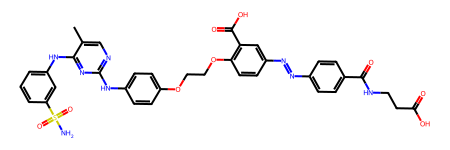

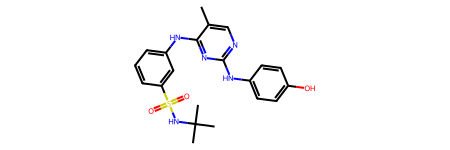

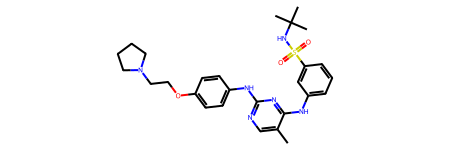

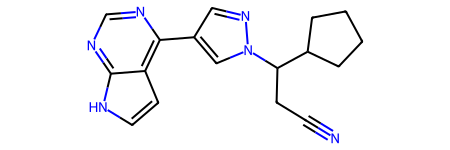

In [10]:
for i in decode(t):
    display(m(i))

In [97]:
import pandas as pd
all_jak_smiles = pd.read_csv('/content/drive/MyDrive/A_DATA/jak_smiles_CoGT_MTATFP.csv')
smi_list = all_jak_smiles['Smiles'].tolist()

In [108]:
data_train = smi_list[:int(len(smi_list)*0.8)]
data_test = smi_list[int(len(smi_list)*0.8):]
print(len(data_train), len(data_test))

16975 4244


In [131]:
from torch.utils.data import Dataset, DataLoader

# class jak_dataset_(Dataset):
#     def __init__(self, data):
#         tensor, lens = encode(data)
#         matrix = To_matrix(tensor)
#         self.df = matrix
#         self.lens = lens
#         self.len = matrix.shape[0]
#     def __len__(self): return self.len
#     def __getitem__(self, idx):
#         # if isinstance(self.df, pd.core.series.Series):
#         #     return self.df.iloc[idx]
#         # if isinstance(self.df, list): return self.df[idx]
#         if isinstance(self.df, torch.Tensor): return self.df[idx], self.lens[idx]

# batch_size = 64
# train_loader = DataLoader(jak_dataset_(data_train),
#                           batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(jak_dataset_(data_test),
#                          batch_size=batch_size, shuffle=True)

class jak_dataset_(Dataset):
    def __init__(self, df):
        self.df = df
        self.len = len(df)
    def __len__(self): return self.len
    def __getitem__(self, idx):
        if isinstance(self.df, pd.core.series.Series):
            return self.df.iloc[idx]
        if isinstance(self.df, list): return self.df[idx]

batch_size = 64
train_loader = DataLoader(jak_dataset_(data_train),
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(jak_dataset_(data_test),
                         batch_size=batch_size, shuffle=True)

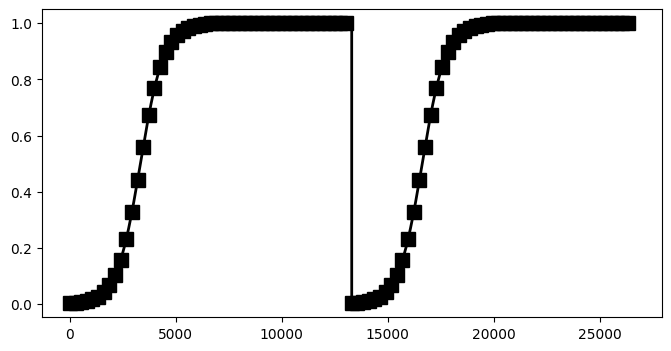

In [110]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
def frange_cycle_sigmoid(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # step is in [0,1]

    # transform into [-6, 6] for plots: v*12.-6.

    for c in range(n_cycle):

        v , i = start , 0
        while v <= stop:
            L[int(i+c*period)] = 1.0/(1.0+ np.exp(- (v*12.-6.)))
            v += step
            i += 1
    return L

batch_size = batch_size
epochs= 100
n_epoch = int(len(train_loader)*epochs)

# beta_np_cyc = frange_cycle_linear(0.0, 1.0, n_epoch, 1)
beta_np_cyc = frange_cycle_sigmoid(0.0, 1.0, n_epoch, 2)

fig=plt.figure(figsize=(8,4.0))
stride = max(int(n_epoch / epochs), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-',
         label='Cyclical', marker= 's', color='k',
         markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

tensor([71, 67, 69, 55, 57, 58, 65, 70, 58, 79, 74, 65, 59, 68, 72, 54, 80, 46,
        63, 53])

In [151]:
import torch
from torch import nn
from tokenizer import encode, get_vocab_size
from torch.autograd import Variable
import torch.nn.functional as F
device = 'cuda' if torch.cuda.is_available() else 'CPU'
class RNNEncoder(nn.Module):
    """
    Adapted from GENTRL RNN language model for SMILES
    :param dims: [alphabet_len, h_dim, z_dim]
        In Gentrl, h_dim = 256
    :param num_layers: GRU layer number
        In Gentrl, num_layers = 2
    :param dropout: rnn dropout
    :param bidirectional: True or False
    """
    def __init__(self, dims, num_layers=2, bidirectional=False, dropout=0.5):
        super(RNNEncoder, self).__init__()
        alphabet_len, h_dims, z_dim = dims
        self.dims = dims
        self.num_layers = num_layers
        self.dropout = dropout
        self.bi = bidirectional
        h_dim = h_dims[0]
        self.embs = nn.Embedding(alphabet_len, h_dim) # [max_len, bs, h_dim]
        self.rnn = nn.GRU(input_size=h_dim, hidden_size=h_dim,
            num_layers=num_layers, bidirectional=bidirectional, dropout=dropout)
        # returns tuple, need [0] to get tensor
        linear_layers = [nn.Linear(h_dims[i-1], h_dims[i]
                                   ) for i in range(1, len(h_dims))]
        self.mlp = nn.ModuleList(linear_layers)
        self.relu = nn.LeakyReLU()
        self.mu = nn.Linear(h_dims[-1], z_dim)
        self.logvar = nn.Linear(h_dims[-1], z_dim)

    def reparametrize(self, mu, logvar):
        epsilon = Variable(torch.randn(mu.size()), requires_grad=False)
        if mu.is_cuda: epsilon = epsilon.cuda()
        std = logvar.mul(0.5).exp_()
        z = mu.addcmul(std, epsilon)
        return z

    def forward(self, x):
        """
        :param x: list of smiles
        """
        tokens, lens = encode(x)
        to_feed = tokens.transpose(1, 0).to(device) # [num_compounds, max_len]
        outputs = self.rnn(self.embs(to_feed))[0]

        x = outputs[lens, torch.arange(len(lens))] # [num_drugs, max_len]
        for layer in self.mlp:
            x = self.relu(layer(x))
        mu = self.mu(x)
        logvar = F.softplus(self.logvar(x))
        return self.reparametrize(mu, logvar), mu, logvar

# https://github.com/daandouwe/grammar-vae/blob/master/src/decoder.py

class RNNDecoder(nn.Module):
    def __init__(self, dims, rnn_type='lstm'):
        """
        param dims: [z_dim, h_dims, x_dim]
        """
        super(RNNDecoder, self).__init__()
        z_dim, h_dims, alphabet_len = dims
        if isinstance(h_dims, list) != True: h_dim = h_dims
        else: h_dim = h_dims[0]
        self.dims = dims
        self.h_dim = h_dim
        self.rnn_type = rnn_type
        self.linear_in = nn.Linear(z_dim, h_dim)
        # linear_layers = [nn.Linear(h_dims[i-1], h_dims[i]
        #                            ) for i in range(1, len(h_dims))]
        # self.mlp = nn.ModuleList(linear_layers)
        self.relu = nn.LeakyReLU()
        self.linear_out = nn.Linear(h_dim, alphabet_len)
        if rnn_type == 'lstm':
            self.rnn = nn.LSTM(h_dim, h_dim, batch_first=True)
        elif rnn_type == 'gru':
            self.rnn = nn.GRU(h_dim, h_dim, batch_first=True)
        else: raise ValueError('select rnn type [lstm, gru]')

    def forward(self, z, max_len=ATOM_MAX_LEN):
        x = self.linear_in(z)
        x = self.relu(x)
        # print(x.shape) [batch_size, h_dim]
        x = x.unsqueeze(1).expand(-1, max_len, -1)
        # print(x.shape) [batch_size, max_len, h_dim]
        hx = Variable(torch.zeros(x.size(0), self.h_dim))
        # print(hx.shape) [batch_size, h_dim]
        hx = (hx, hx, hx) if self.rnn_type =='lstm' else hx
        # print(hx.shape)
        x, hn = self.rnn(x)
        x = self.relu(x)
        x_ = x.contiguous().view(-1, x.size(-1))
        # print('here', x.shape)
        x0 = F.softmax(self.linear_out(x_),dim=1)
        # print(x.shape)
        x = x0.contiguous().view(x.size(0), -1, x0.size(-1))
        return F.softmax(x, dim=2)
        # return To_vector(x)
h_dims = [128]
dims_decoder = [50, h_dims, 40]
model_a_D = RNNDecoder(dims_decoder, rnn_type='gru')
z = torch.randn([1, 50])
model_a_D(z.cpu(), 120).shape

class RNNVAE(nn.Module):
    def __init__(self, enc, dec):
        super(RNNVAE, self).__init__()
        self.enc = enc
        self.dec = dec

    def forward(self, x): # x is a list of smiles
        z, mu, logvar = self.enc(x)
        recon_x = self.dec(z, max_len=ATOM_MAX_LEN)
        return recon_x, mu, logvar


In [147]:
# z_dim = 50
# h_dims = [128]
# dims = [get_vocab_size(), h_dims, z_dim]

# encoder = RNNEncoder(dims)
# decoder = RNNDecoder([z_dim, h_dims, get_vocab_size()], rnn_type='lstm')
# model = RNNVAE(encoder, decoder)

In [152]:
def loss_function(recon_x, x, mu, logvar, beta=1):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1+logvar-mu.pow(2)-logvar.exp())
    LOSS = BCE + beta * KLD
    return LOSS, BCE, KLD

In [161]:
def train(epoch,beta_kl=1):
    model.train()
    train_loss, BCE_loss, KLD_loss = 0, 0, 0
    for i, smis in tqdm(enumerate(train_loader), total=len(train_loader),
                        desc=f'epoch {epoch}'):
        # data = data.to(device)
        # print(i, smis)
        optimizer.zero_grad()
        if isinstance(beta_kl, int) == False: beta = beta_kl[i*epoch]
        else: beta = beta_kl
        recon_x, mu, logvar = model(smis)
        x, _ = encode(smis)
        x = To_matrix(x)
        if cuda: x = x.cuda()
        loss, bce, kld = loss_function(recon_x, x, mu, logvar, beta)

        loss.backward()
        optimizer.step()
        BCE_loss += bce.item()
        KLD_loss += kld.item()
        train_loss += loss.data.item()
    train_loss /= len(train_loader)
    BCE_loss /= len(train_loader)
    KLD_loss /= len(train_loader)
    KLD_percent = KLD_loss / (KLD_loss + BCE_loss)

    print(f'[train] loss: {train_loss:.3f}, BCE: {BCE_loss:.3f}, '
          f'KLD: {KLD_loss:.3f}, KLD/(KLD+BCE): {KLD_percent*100:.3f}%',
          f'beta:{beta:.2f}')

    # print(f'try decode {list(smiles.keys())[0]}')
    if epoch % 20 == 0 and epoch != 0:
        for i in model(smiles):
            try:
                display(m(i))
            except: pass

    return train_loss, BCE_loss, KLD_loss, KLD_percent

def test(epoch):
    model.eval()
    test_loss, BCE_loss, KLD_loss = 0, 0, 0
    for smis in test_loader:
        recon_x, mu, logvar = model(smis)
        x, _ = encode(smis)
        x = To_matrix(x)
        if cuda: x = x.cuda()
        loss, bce, kld = loss_function(recon_x, x, mu, logvar, beta=1)
        BCE_loss += bce.item()
        KLD_loss += kld.item()
        test_loss += loss.data.item()
    test_loss /= len(test_loader)
    BCE_loss /= len(test_loader)
    KLD_loss /= len(test_loader)
    KLD_percent = KLD_loss / test_loss
    print(f'[test] loss: {test_loss:.3f}, BCE: {BCE_loss:.3f}, '
          f'KLD: {KLD_loss:.3f}, KLD/loss: {KLD_percent*100:.3f}%')
    return test_loss, BCE_loss, KLD_loss, KLD_percent

In [162]:
from a_inhibitor_design.model.evaluate_utils import get_min, plot_loss, plot_kld
import torch.optim as optim
h_dims = [256]
z_dim = 50
dims = [get_vocab_size(), h_dims, z_dim]
encoder = RNNEncoder(dims, num_layers=2, bidirectional=False, dropout=0.5)

dims_decoder = [z_dim, h_dims, get_vocab_size()]
decoder = RNNDecoder(dims_decoder, rnn_type='gru')
model = RNNVAE(encoder, decoder)
if cuda: model = model.cuda()

train_dict, valid_dict = {}, {}
train_kld, valid_kld = {}, {}
epochs = 100
model_path = 'gentrl_test_vae/'
os.mkdir(model_path)
model_saved_names = []
argmin_epoch = -1
optimizer = optim.AdamW(params=model.parameters(), lr=1e-4, weight_decay=1e-3)

In [163]:
if argmin_epoch != -1:
    model.load_state_dict(torch.load(model_saved_names[-1],
                                    map_location=device))
start_epoch = argmin_epoch+1

for epoch in range(start_epoch, start_epoch + epochs):
    train_dict[epoch], _, _, train_kld[epoch] = train(
                            epoch, beta_kl=beta_np_cyc)

    valid_dict[epoch], _, _, valid_kld[epoch] = test(epoch)

    if epoch != 0 and epoch % 5 == 0:
        plot_loss(train_dict, valid_dict)
        plot_kld(train_kld, valid_kld)

    argmin_epoch, min_loss = get_min(valid_dict)

    if epoch == argmin_epoch and epoch > 10:
        model_name = model_path+f'ckpt_{str(argmin_epoch)}.pt'
        torch.save(model.state_dict(), model_name)
        print('model save at: ',  model_name)
        model_saved_names.append(model_name)
        while len(model_saved_names) > 10:  # only reserve 10 models
            try:
                remove_model_name = model_saved_names.pop(0)
                print('remove ', remove_model_name)
                os.remove(remove_model_name)
            except:
                print(f'error when delete {model_saved_names[0]}')
    else:
        if epoch - argmin_epoch > 50:
            print('early stop, loss no decrease')
            break
        if valid_dict[epoch] / min_loss > 3:
            print(f'early stop, loss increase')
            break

epoch 6:  57%|█████▋    | 152/266 [00:18<00:14,  8.06it/s]


KeyboardInterrupt: ignored